In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

In [2]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 
#mnist dataset 내부에서 자체적으로 이미 test, train set을 나누어 놓아서 이렇게 해도 ok. 원래는 train_test_split 사용

#### 5를 감지하는 이진 분류기 만들기

In [13]:
y_train_5 = (y_train == '5') #train set 내에서 5이면 True, 5가 아니면 False 반환하는 벡터. 
y_test_5 = (y_test == '5')

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42) 
sgd_clf.fit(X_train, y_train_5) #이진 분류기이기 때문에 y_train_5로 써주기

SGDClassifier(random_state=42)

In [17]:
sgd_clf.predict(X[0:1])

array([ True])

In [20]:
y[0:1]

0    5
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

분류기가 5를 정확하게 맞췄다.

#### 이진 분류기의 성능 측정

##### 교차검증

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [27]:
from sklearn.base import BaseEstimator
import numpy as np

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)
    

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [28]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [29]:
from sklearn.metrics import confusion_matrix #오차행렬
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [30]:
from sklearn.metrics import precision_score, recall_score #정밀도와 재현율
precision_score(y_train_5, y_train_pred) 

0.8370879772350012

In [31]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [32]:
from sklearn.metrics import f1_score #f1 score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [68]:
y_scores = sgd_clf.decision_function(X[0:1]) #decision_function 메서드를 통해 각 샘플의 score
y_scores #출력

array([2164.22030239])

In [71]:
y_some_digit_pred = (y_scores>threshold)
threshold=0

In [72]:
y_some_digit_pred

array([ True])

In [73]:
threshold = 1000
y_some_digit_pred

array([ True])

In [74]:
threshold=50000
y_some_digit_pred

array([ True])

In [75]:
threshold=10^999999
y_some_digit_pred

array([ True])

In [76]:
threshold=9000
y_scores

array([2164.22030239])

In [77]:
y_some_digit_pred = (y_scores>threshold)

In [78]:
threshold=9000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

In [79]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method='decision_function')

In [80]:
from sklearn.metrics import precision_recall_curve 

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

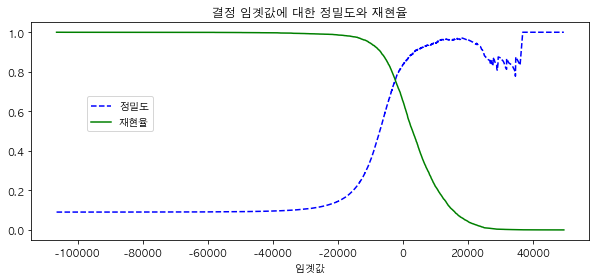

In [107]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'  #한글 출력
matplotlib.rcParams['axes.unicode_minus']=False #마이너스 깨짐 방지
%matplotlib inline

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(10,4))
    plt.plot(thresholds, precisions[:-1], 'b--', label='정밀도')
    plt.plot(thresholds, recalls[:-1], 'g-', label='재현율')
    plt.title('결정 임곗값에 대한 정밀도와 재현율')
    plt.xlabel('임곗값')
    plt.legend(loc=(0.1,0.5))
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

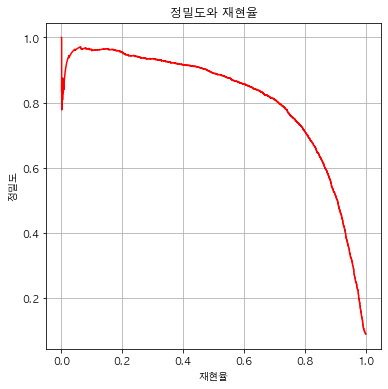

In [116]:
def plot_precision_vs_recall(precisions, recalls):
    plt.figure(figsize=(6,6))
    plt.plot(recalls[:-1], precisions[:-1], 'r-')
    plt.title('정밀도와 재현율')
    plt.xlabel('재현율')
    plt.ylabel('정밀도')
    plt.grid()

plot_precision_vs_recall(precisions, recalls)
plt.show()

In [121]:
threshold_90_precision = thresholds[np.argmax(precisions>=0.90)] 
#정밀도 0.90 이상을 만족하는 임곗값 설정. 이때 np.argmax는 True를 가지는 첫 번째 인덱스 반환

In [122]:
y_train_pred_90 = (y_scores > threshold_90_precision) #예측하는 벡터

In [123]:
precision_score(y_train_5, y_train_pred_90) #정밀도를 0.90 이상으로 설정했으니까

0.9

In [124]:
recall_score(y_train_5, y_train_pred_90) #이때 재현율은 0.47정도

0.47980077476480354

In [125]:
#임곗값 확인
threshold_90_precision

3370.0194991439557

In [126]:
#임곗값을 올리면?
threshold_90_precision = 7000
y_train_pred_90 = (y_scores>threshold_90_precision)

In [127]:
precision_score(y_train_5, y_train_pred_90)

0.9308681672025724

In [128]:
recall_score(y_train_5, y_train_pred_90)

0.32042058660763695